# 확률적 경사 하강법

1. 배치 경사 하강법

    전체 데이터에 대한 오류를 구한 후 기울기를 한 번만 구하여 가중치를 업데이트 하는 방법

    학습이 오래 걸린다는 단점이 있다.

2. 확률적 경사 하강법

    임의로 선택한 데이터에 대해 기울기를 계산한다. 빠른 계산이 가능하다는 장점이 있지만 파라미터 변경폭이 불안정하고 배치 경사 하강법에 비해 정확도가 낮다는 단점이 있다.

3. 미니배치 경사 하강법

    데이터 세트를 미니배치로 나누고, 미니베치미다 기울기를 구하여 그것의 평균 기울기를 구하여 파라미터를 업데이트 한다.

    배치 경사 하강법 보다 속도는 빠르고 확률적 경사 하강법보다 안정적이고 정확도가 높다는 장점이 있다.


# 손실함수
손실 함수란 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준이다.(샘플 하난에 대한 손실을 정의한다.)

(비용 함수(cost function)는 훈련 세트에 있는 모든 샘플에 대한 손실 함수의 합을 말한다.)

- 로지스틱 손실 함수 = 이진 크로스엔트로피 손실 함수
   
    Cross Entropy를 사용하여 두 확률 분포 사이의 오차(또는 차이)를 측정할 수 있습니다.
    예를 들어, 이진 분류(Binary Classification)의 경우
    Cross Entropy는 다음과 같이 주어집니다.

    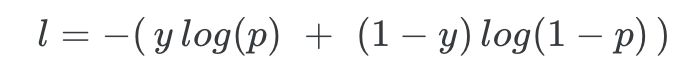

- 크로스 엔트로피 손실 함수

    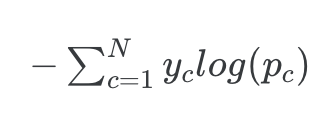
    



### SGDClassifier


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
fish = pd.read_csv('/Users/ujong-yun/Documents/GitHub/machinelearning-deeplearning/fish.csv')

In [7]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [16]:
sc = SGDClassifier(loss = 'log_loss', max_iter = 10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8319327731092437
0.8


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [17]:
# partial_fit() 호출할 때마다 1 에포크씩 이어서 훈련할 수 있다.
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [19]:
sc = SGDClassifier(loss = 'log_loss', random_state= 42)
train_score = []
test_score = []
classes = np.unique(train_target)

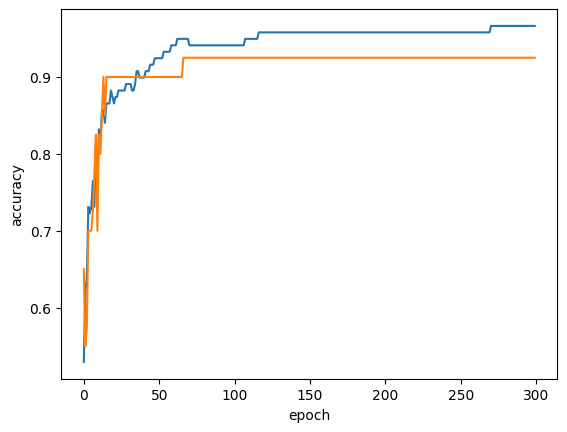

In [20]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes = classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


In [21]:
sc = SGDClassifier(loss = 'log_loss', tol = None, max_iter=100, random_state=42)
#tol 매개변수 : 자동으로 멈추지 않고 max_iter = 100 만큼 무조건 반복하도록 한다.
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [22]:
#한지 손실 : 서포트 벡터 머신이라는 알고리즘을 위한 손실 함수
#SGDClassifier가 여러 종류의 손실 함수를 loss 매개변수에 지정하여 다양한 머신러닝 알고리즘을 지원한다.
sc = SGDClassifier(loss = 'hinge', tol = None, max_iter=100, random_state=42)
#tol 매개변수 : 자동으로 멈추지 않고 max_iter = 100 만큼 무조건 반복하도록 한다.
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
